# **Not an ideal network**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# usual incantations  
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
# keras provide mnist dataset with its package
# here we are loading the dataset into memory
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


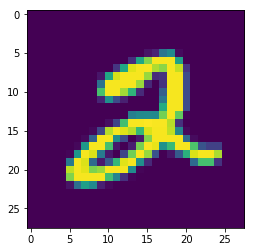

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
'''
we are printing the image. By eye balling the image, we get know approximately 
how many convolutional layers we need to add to learn edges and gradients in the 
starting layers and then add max pooling layer. Hhre, the object (number 2) 
looks to be of 20x20 size and receptive field of size 7x7 seems to be good to 
capture the edges and gradients.
'''
plt.imshow(X_train[5])

In [0]:
'''
Shape of image in the dataset doesn't has third channel as it's a black and 
white image. Therefore, we add third channel as 1 here as the input dimension to
the conv layers must have 3 dimensions.
'''
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
'''
Normalising the image to 0 to 1 range which helps in faster convergence.  
'''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# printing first 10 elements of y vector
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# after using one hot encoding, printing the elements of y vector 
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
#In this cell, we define our CNN model to classify the digits in the images. 

from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # input shape : 28x28x1, RF of layer1: 3
model.add(Convolution2D(64, 3, 3, activation='relu')) # input shape: 26x26x32, RF of layer2: 5
model.add(Convolution2D(128, 3, 3, activation='relu')) # input shape: 24x24x64, RF of layer3: 7

model.add(MaxPooling2D(pool_size=(2, 2))) # input shape: 22x22x128, RF of layer4: 14

model.add(Convolution2D(256, 3, 3, activation='relu')) # input shape: 11x11x128, RF of layer5: 16
model.add(Convolution2D(512, 3, 3, activation='relu')) # input shape: 9x9x256, RF of layer6: 18
model.add(Convolution2D(1024, 3, 3, activation='relu')) # input shape: 7x7x512, RF of layer6: 20
model.add(Convolution2D(2048, 3, 3, activation='relu')) # input shape: 5x5x1024, RF of layer6: 22
model.add(Convolution2D(10, 3, 3, activation='relu')) # input shape: 3x3x2048, RF of layer6: 24

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

W0727 11:49:59.980654 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0727 11:50:00.001131 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0727 11:50:00.003778 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2048, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app


In [11]:
'''
Here we define loss function for the model using which gradient 
descent optimizer (Adam) and which metric (accuracy) to maximise
'''
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0727 11:50:24.702641 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0727 11:50:24.730851 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [12]:
# we train the model for 10 epochs here 
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0727 11:50:25.480884 140043660154752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0727 11:50:25.560332 140043660154752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.9367 - acc: 0.2730
Epoch 2/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.8980 - acc: 0.2819
Epoch 3/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.8905 - acc: 0.2836
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.8869 - acc: 0.2847
Epoch 5/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.8823 - acc: 0.2852
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.8902 - acc: 0.2829
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.2405 - acc: 0.1299
Epoch 8/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 115s 2ms/step - loss: 2.3026 - a

In [0]:
# evaluating the moddel score of the test data
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
# printing the score of the model
print(score)

[2.3025851249694824, 0.098]


In [0]:
# getting the predictions of the model on test data
y_pred = model.predict(X_test)

In [16]:
# printing the first 10 predictions and comparing against the actuals
# Looking at the output, the model doesn't seem to be working at all
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


In [0]:
'''
What's wrong with this model? The number of kernels from 3rd conv layer onwards 
doesn't seem to be justified. MNIST images are relaitvely very simple. They have
limited number of edges, curves and gradients to learn and since the images are
in black and white format that further reduces the complexity of images. This 
means that we don't need that many number of  kernels, especially the 
number of kernels we see after 3rd conv layer. We could have instead used 1D
convolution to reduce the number of channels in the input  after third conv layer
and then, again increase the number of kernels till 128 or so. This would have brought 
the number of parameters to learn significantly down. 
'''